In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco
import scipy.interpolate as sci
from scipy import stats
%matplotlib inline
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import fix_yahoo_finance as yf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Data.csv")

In [4]:
df

,Date,AA_Close,AABA_Close,AAL_Close,AAPL_Close,ABBV_Close,ABEV_Close,ABT_Close,ABX_Close,ACB_Close,...,WDC_Volume,WFC_Volume,WMB_Volume,WMT_Volume,WPX_Volume,WU_Volume,WY_Volume,X_Volume,XOM_Volume,ZNGA_Volume
0,2016-11-21,30.690001,41.110001,46.080002,111.730003,60.419998,5.18,39.759998,15.390000,2.091,...,3887200,23587200,13312000,8356000,7102700,4162300,5352800,12353900,8861500,3858800
1,2016-11-22,31.340000,41.009998,46.080002,111.800003,58.930000,5.06,38.099998,15.350000,1.820,...,2696300,22816900,6245700,10984000,11690900,3242900,4951500,28316700,9390200,8286300
2,2016-11-23,31.510000,40.959999,46.340000,111.230003,60.180000,5.17,38.980000,14.630000,2.107,...,2201600,19986800,5890600,7398900,5790200,2357300,3569100,25442700,5996300,4364400
3,2016-11-25,31.700001,40.869999,46.820000,111.790001,60.509998,4.96,39.160000,14.760000,2.030,...,1315400,9635500,3218000,4234400,3950400,1341200,1687500,10655300,5042300,2216000
4,2016-11-28,30.860001,41.450001,46.500000,111.570000,59.459999,5.11,38.740002,15.400000,2.040,...,4726700,26518500,6203500,7099200,10573400,2830400,5652400,19480100,7449600,4424200
5,2016-11-29,29.730000,41.599998,46.889999,111.459999,61.590000,4.99,38.730000,15.440000,1.976,...,5053000,16267300,8627200,7310100,10298100,2167700,3811100,25798200,9181100,6355500
6,2016-11-30,28.969999,41.020000,46.439999,110.519997,60.799999,4.99,38.070000,15.020000,2.005,...,5383000,26567200,13158300,9326100,20280100,3653600,5953700,18482000,22696200,5403300
7,2016-12-01,28.879999,39.630001,45.750000,109.489998,59.160000,4.76,37.599998,15.020000,1.944,...,5508400,35623100,6998600,6849800,13491300,3316700,2959100,12981300,13005600,18944500
8,2016-12-02,29.040001,40.070000,46.099998,109.900002,59.430000,4.78,37.900002,15.660000,1.820,...,3496900,21894700,6815100,6674200,6655300,3776700,2819700,13634900,9706600,5178600
9,2016-12-05,31.219999,40.200001,45.720001,109.110001,60.860001,4.82,38.430000,15.710000,1.650,...,6865600,24793900,8336000,10527900,9121600,4785600,2970600,18706100,11741100,8295500


In [6]:
import re

In [7]:
close = list()
for column in df.columns:
    p = r'[a-zA-Z-]+_Close$'
    match = re.findall(p, column)
    close += match

In [9]:
df = df[close]

In [11]:
close = df

In [13]:
close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Columns: 251 entries, AA_Close to ZNGA_Close
dtypes: float64(251)
memory usage: 988.4 KB


In [14]:
# Initial analysis, calculate the rate of return 
log_returns = np.log(close/close.shift(1)) 
# To optimize the portfoio
rets = log_returns
year_ret = rets.mean() * 252 # calculate yearly rate of return 
year_volatility = rets.cov() * 252 # calculate the covariance matrix

In [36]:
rets = rets.iloc[:,0:100]

In [37]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 100 columns):
AA_Close       503 non-null float64
AABA_Close     503 non-null float64
AAL_Close      503 non-null float64
AAPL_Close     503 non-null float64
ABBV_Close     503 non-null float64
ABEV_Close     503 non-null float64
ABT_Close      503 non-null float64
ABX_Close      503 non-null float64
ACB_Close      503 non-null float64
ACN_Close      503 non-null float64
ADBE_Close     503 non-null float64
ADM_Close      503 non-null float64
AES_Close      503 non-null float64
AET_Close      503 non-null float64
AFL_Close      503 non-null float64
AGNC_Close     503 non-null float64
AIG_Close      503 non-null float64
AMAT_Close     503 non-null float64
AMD_Close      503 non-null float64
AMRN_Close     503 non-null float64
AMZN_Close     503 non-null float64
APA_Close      503 non-null float64
APC_Close      503 non-null float64
AR_Close       503 non-null float64
ARRS_Close     503 non-null fl

In [38]:
number_of_assets = 100 # we have 251 stocks in total
weights = np.random.random(number_of_assets) # generate 25 random numbers
weights /= np.sum(weights) # to normalize the 25 random variables and make their sum to 1

In [39]:
weights.shape

(100,)

In [41]:
portfolio_returns = []
portfolio_volatilities = [] # create new list to store the returns and volatities calculated later
for p in range(1000):
    weights = np.random.random(number_of_assets)
    weights /=np.sum(weights)
    portfolio_returns.append(np.sum(rets.mean() * weights) * 252)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() *252, weights))))

In [42]:
portfolio_returns

[0.017260727915188543,
 0.0384418480540074,
 0.01796005167580303,
 0.019474182672699764,
 0.02124603536775343,
 0.02216797070930127,
 0.021738152097751175,
 0.033402036152763846,
 0.03573067624263247,
 0.04025145313832957,
 -0.015939954794757284,
 0.020229939549276,
 0.025714785227950055,
 0.026145863528606726,
 0.014926373882409747,
 0.006077096942012562,
 0.03204719707098713,
 0.015502994015245108,
 0.0123121951556073,
 0.010696796099630604,
 -0.009918009068297356,
 0.016533300850488097,
 0.02769374640697989,
 0.0057108098637653325,
 0.02306862680824816,
 0.03622135377457283,
 0.01980601639340637,
 0.01902311991834592,
 0.00034437603982082776,
 0.015319979041975483,
 0.030287926172919137,
 0.03688644894970557,
 0.020159569291172814,
 0.015020199388007187,
 0.026229743049410816,
 0.01901273353406616,
 0.033461258939591926,
 0.002758824068699009,
 0.035245599919020904,
 0.02628705561693254,
 0.021929402682811475,
 0.03321224618991572,
 0.018484193841592028,
 0.025080953423081098,
 0.02

In [43]:
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

In [44]:
portfolio_returns

array([ 0.01726073,  0.03844185,  0.01796005,  0.01947418,  0.02124604,
        0.02216797,  0.02173815,  0.03340204,  0.03573068,  0.04025145,
       -0.01593995,  0.02022994,  0.02571479,  0.02614586,  0.01492637,
        0.0060771 ,  0.0320472 ,  0.01550299,  0.0123122 ,  0.0106968 ,
       -0.00991801,  0.0165333 ,  0.02769375,  0.00571081,  0.02306863,
        0.03622135,  0.01980602,  0.01902312,  0.00034438,  0.01531998,
        0.03028793,  0.03688645,  0.02015957,  0.0150202 ,  0.02622974,
        0.01901273,  0.03346126,  0.00275882,  0.0352456 ,  0.02628706,
        0.0219294 ,  0.03321225,  0.01848419,  0.02508095,  0.02573174,
        0.00512143,  0.03274552,  0.03532117,  0.02533263,  0.00564909,
        0.03619027,  0.02454108,  0.02602329,  0.0441958 ,  0.00786914,
        0.00422   ,  0.02385371,  0.04264996,  0.02796167,  0.03407903,
        0.03488584,  0.02337059,  0.03926196, -0.0112745 ,  0.0123999 ,
        0.03241407,  0.04091398,  0.01745007,  0.0307371 ,  0.02

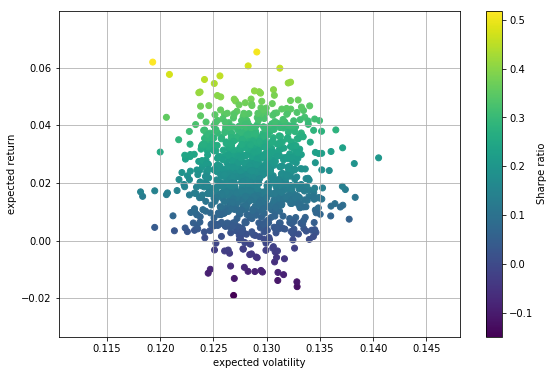

In [45]:
# draw a scatter picture to find the point with highest sharp ratio
plt.figure(figsize=(9,6))
plt.scatter(portfolio_volatilities, portfolio_returns, c=portfolio_returns/portfolio_volatilities, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [46]:
# use a function, when you input weights, the rate of return, votalities and sharpe ratio will be the output
def calculations(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean()*weights)*252
    pvol = np.sqrt(np.dot(weights.T,np.dot(rets.cov()*252, weights)))
    return np.array([pret, pvol, pret/pvol])

In [47]:
def min_func_sharpe(weights):
    return -calculations(weights)[2]

In [48]:
bnds = tuple((0,1) for x in range(number_of_assets))# boundary condition:every weight needs to be in(0,1)
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # constraints
number_of_assets * [1. / number_of_assets,]  # input initial weights for 251 stocks

[0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01]

In [49]:
bnds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [50]:
# use package to apply minimization optimization algorithm 
opts = sco.minimize(min_func_sharpe, 
                    (number_of_assets * [1. / number_of_assets,]), 
                    method='SLSQP', bounds=bnds, constraints=cons)

In [51]:
opts['x'].round(3) # weight distribution under the largest sharp ratio

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.044, 0.   , 0.018,
       0.   , 0.006, 0.   , 0.   , 0.185, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.019, 0.014, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.107, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.09 , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.106, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.037, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.081, 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.216, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.076, 0.   , 0.   , 0.   ,
       0.   ])